# **AISaturdays Ocean Proximity Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial del curso de Deep Learning.

En este ejercicio trataremos de predecir la proximidad del océano con respecto a un conjunto de viviendas.

**Enlaces:**
- AISaturdays Deep Learning [temario clase 1](https://app.eduflow.com/courses/d4d36f90-f65e-4ede-b8f3-16f498ce3a33/flows/98016aaa-4e29-428f-a8f9-d5d9477d7274/activities/d9f00e62-0403-4a21-bdae-c6a3ea2984e5).
- Ejercicio Kaggle: https://www.kaggle.com/camnugent/california-housing-prices

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: *Pandas, MatPlotLib, Numpy, Scikit-learn, Keras,TensorFlow*.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Modelo de redes neuronales*" para procesar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción y evitar overfitting.


¡Empecemos!

#1. Importación de librerías


*Importaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf

2024-03-10 09:30:17.825648: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 09:30:17.834514: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 09:30:21.104285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)

### Obtener el dataset y previsualizar la información del dataset.

¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV.

Los datos se almacenarán en un dataframe llamado **df**.

In [2]:
# Sólo con una línea de código
df = pd.read_csv('./housing.csv')


1. Tu turno. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [3]:
# Sólo con una línea de código
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**  ¡El resultado! Significa la proximidad del océano con respecto a las viviendas de esta zona. Si nos fijamos, este campo contiene valores de cadena (etiquetas) para determinar la proximidad.



### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

2. Utiliza la función .describe() para analizar la distribución de los datos


---

In [4]:
# Sólo con una línea de código
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
![California](https://california.azureedge.net/cdt/CAgovPortal/images/Uploads/menu-living.jpg)
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.




<Figure size 1000x700 with 0 Axes>

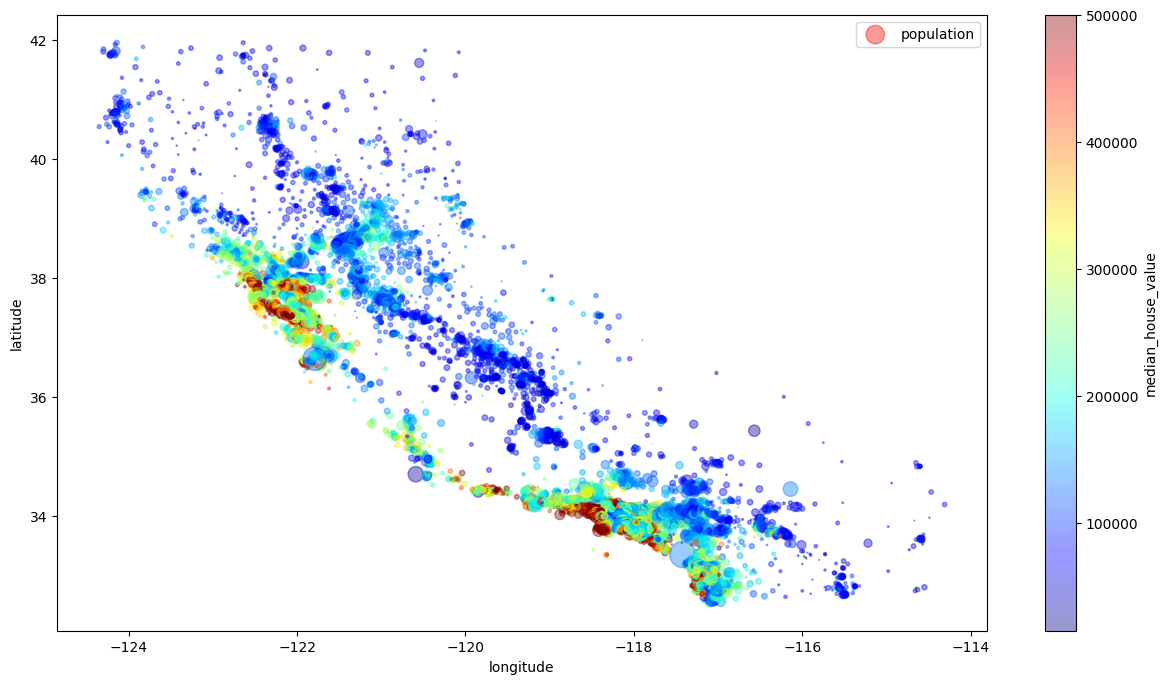

In [5]:
# Ejecutar el siguiente código
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=plotter["population"]/100, label="population", figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, )
plt.legend()

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir y mejorar información en el dataset que pueda faltar, sea inconsistente o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset. 

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



3. Muestra el sumatorio de los valores nulos del dataset: df.isnull()...
[Documentación](https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)


---

In [6]:
# Sólo con una línea de código
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

4. Elimina las filas que tengan valores a 0: df.dropna(...) [Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---

In [25]:
# Sólo con una línea de código
df = df.dropna()

In [27]:
## 
# Sólo con una línea de código
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
##
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


### Analizar relaciones de la información del dataset

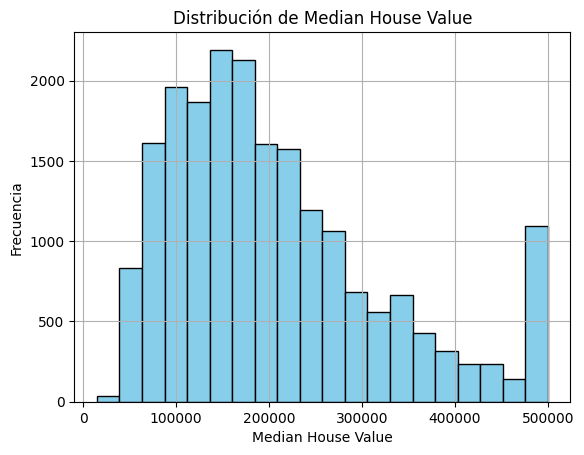

In [35]:
##
df['median_house_value'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frecuencia')
plt.show()

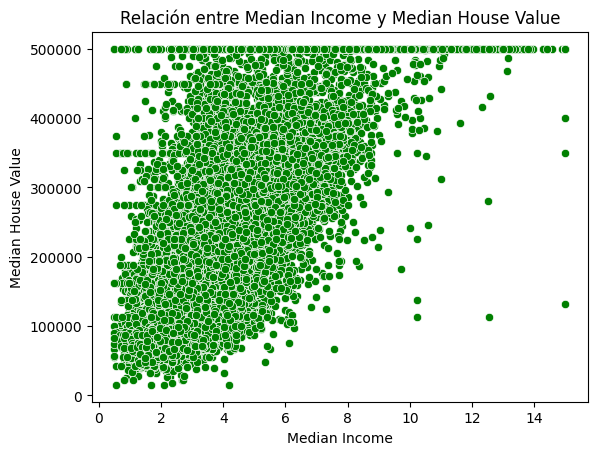

In [36]:
##
# Diagrama de dispersión entre 'median_income' y 'median_house_value'
sns.scatterplot(x='median_income', y='median_house_value', data=df, color='green')
plt.title('Relación entre Median Income y Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [51]:
##
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Normaliza las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,INLAND
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,INLAND
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,INLAND
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,INLAND


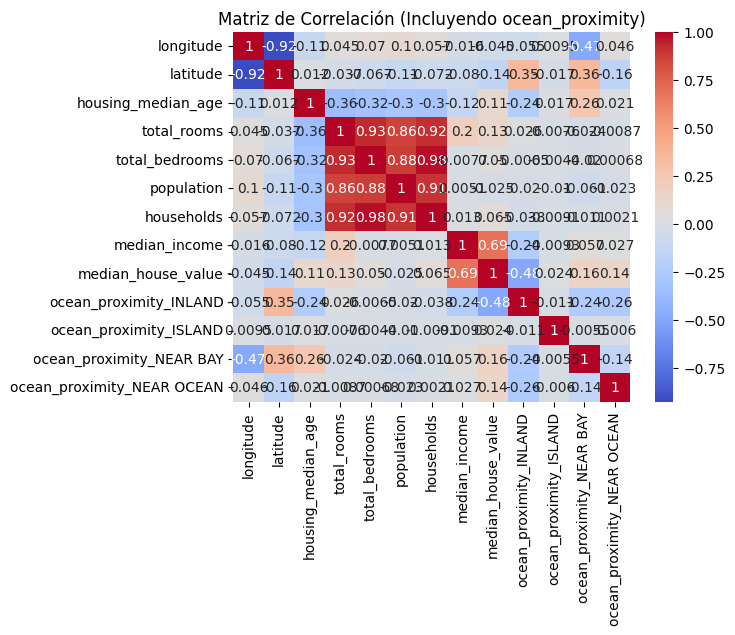

In [52]:
## Paso 1: Utilizar get_dummies para realizar codificación one-hot
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Paso 2: Calcular la matriz de correlación
corr_matrix = df_encoded.corr()

# Paso 3: Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Incluyendo ocean_proximity)')
plt.show()


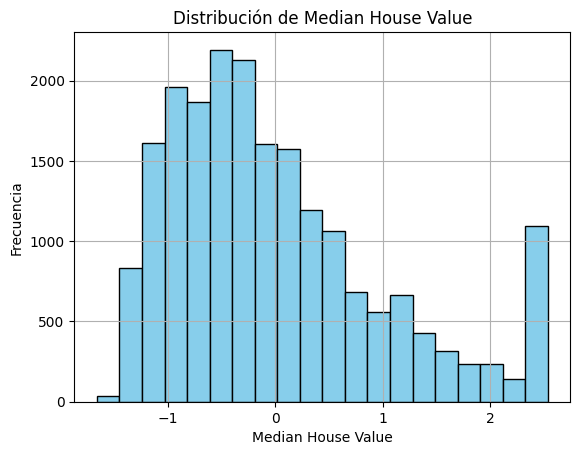

In [53]:
##
##
df['median_house_value'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frecuencia')
plt.show()

5. ¿Cual de estas variables está relacionada con la proxímidad del océano y cúal no? ¿Están relacionadas entre sí? **Explícalo a continuación**

---

“ocean_proximity_INLAND” representa áreas en el interior, lejos del océano.
“ocean_proximity_ISLAND” representa ubicaciones en islas.
“ocean_proximity_NEAR BAY” se refiere a áreas cercanas a bahías.
“ocean_proximity_NEAR OCEAN” indica proximidad directa al océano.
Si una correlacion negati 
a frente aISLAND.



A mayor cercanía de la costa, mayor valor.




---

Crear una matriz de correlación visual. [Pista](https://datascienceplus.com/visualize-correlation-matrices-in-python/)

6. Crea una matriz de correlación visual usando .corr()


---

In [8]:
# Dos líneas de código


! Fíjate en todas posibles feature de la tabla de arriba que indican "**valores  totales**". (Pista: algunas de ellas no llevan el prefijo *total_* )

Estas features de totales nos indican los valores en una zona concreta de un grupo de viviendas. Para mejorar la predicción de nuestro modelo, nos conviene obtener los valores individuales por vivienda.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

7. ¿Qué features están agrupadas por totales? ¿Con qué feature se agrupan y tienen más relación? (Pista: hay tres)

---

8. De las feature agrupadas por totales, obtén las feature invididuales dividiéndolas por las que las agrupa, y añádelas al dataframe
---

In [9]:
# Tres líneas de código



9. Elimina del dataset las feature de totales agrupadas
---

In [10]:
# Sólo con una línea de código


10. Crea de nuevo una matriz de correlación visual usando .corr() para ver las nuevas feature añadidas y su correlación


---

In [11]:
# Dos líneas de código


! Fíjate como ahora al haber procesado y quitado las feature de totales, hemos eliminado algunas correlaciones y la matriz nos muestra correlaciones más coherentes que nos ayudarán a mejorar la predicción de nuestro modelo.



13. Obtén los valores únicos de la feature de la que queremos obtener la predicción (ocean_proximity)


---

In [12]:
# Dos líneas de código


*14*. Explica qué ves en los valores anteriores. 


---

*   Explica aquí qué ves en los valores anteriores que deba mejorarse




---

15. Mejora el dataframe con el análisis anterior


---

In [13]:
# Sólo con una línea de código


### Normalizar las feature para nuestro modelo

![texto alternativo](https://i.imgur.com/o7YvGRe.png)


Ahora deberemos proceder a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción (*Feature Scaling*).
Este paso es fundamental antes de entrenar nuestro modelo.

Puesto que la **función de activación** de nuestro modelo será '**softmax**', cuyos valores son de una escala entre -1 a 1, debemos normalizar las feature en este intervalo. [Pista](https://books.google.es/books?id=M5RRDwAAQBAJ&pg=PA137&lpg=PA137&dq=scaler.fit_transform+values.reshape&source=bl&ots=zzDuEQUdQR&sig=ACfU3U1NPGvTLq46zc-pJwcexE3wGKHQPw&hl=es&sa=X&ved=2ahUKEwi1qtPZ9MDnAhXdDWMBHc-MB0UQ6AEwDXoECAgQAQ#v=onepage&q=scaler.fit_transform%20values.reshape&f=false)

16. Normaliza las feature a la escala de softmax y añádelas al dataframe.


---

In [14]:
# Seis líneas de código (cómo mínimo)


17. Utiliza la función .describe() para analizar la distribución de los datos


---

In [15]:
# Sólo con una línea de código


# 3. Modelo redes neuronales

El modelo de [redes neuronales](https://pathmind.com/wiki/neural-network) es una serie de algoritmos que logran reconocer patrones y correlaciones en un conjunto de datos a través de un proceso que simula el funcionamiento del cerebro con la finalidad de determinar predicciones que puedan interesarnos.

En Deep Learning uno de los usos más frecuentes del modelo de redes neuronales es el caso de análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).



**Ejemplo genérico de Red Neuronal**

![texto alternativo](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.
- Detectar partes del cuerpo en imágenes o gestos.
- Detectar voces, transcripciones, textos..

**Objetivo**
- En este reto, queremos lograr **clasificar** aquellas viviendas según a la cercanía que estén del océano. Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

Creación del modelo de redes neuronales

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [16]:
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Sólo una línea de código

# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
# Dos lineas de código

# Crea el set de datos de entrenamiento y validación.
# Sólo una línea de código
# Convierte y_train y y_test al formato que se necesita par entrenar nuestro modelo con: np_utils.to_categorical


19. Crea y compila el modelo como se indican en los pasos de implementación descritos anteriormente

---

In [42]:
# Importar librerías keras
import keras.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

# Crear el modelo secuencial
# Sólo una línea de código

# Añadir 7 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código



# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código


20. Explica los siguientes conceptos
---
- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
- ¿Qué función de activación se ha seteado en la última capa?
- ¿Por qué se ha elegido esa función de activación en la última capa?
- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
- ¿Qué significa la terminología de función de optimización?


*Escribe aquí las respuestas

In [18]:
# Visualizar el resultado de la compilación del modelo
# Sólo una línea de código


21. Entrena finalmente el modelo con los parámetros necesarios: X_train, Y_train, epochs=???, batch_size=???, validation_data=(X_test,Y_test)
---
- El set de entrenamiento Y_train debe esta previamente convertido al formato que necesita el modelo. No se debe usar directamente el obtenido de train_test_split(...)
- Prueba con diferentes epochs (iteraciones): 10, 100, 500, 1000.
- Prueba con diferentes batch_size: 10, 200, 1000, 100000.

---

In [19]:
#Usa este EarlyStopping para conseguir un mejor modelo
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, restore_best_weights=True,patience=10)
# Sólo con una línea de código. Recuerda guardar el historial de entrenamiento para los siguientes pasos.


In [20]:
# Evalua el modelo con los datos de X_test y Y_test


22. Explica qué ocurre con diferentes epochs y batch_size
---
- ¿Qué ocurre con demasiados epochs? [Pista](#https://stats.stackexchange.com/questions/384593/why-too-many-epochs-will-cause-overfitting)
- ¿Qué ocurre con un valor demasiado grande de batch_size?


---

*Escribe aquí las respuestas:

Demasiadas epochs generan overfitting.
Batch sizes demasiado grandes son muy rápidas per epoch pero también generan overfiting.
Batch sizes demasiado pequeñas tardan demasiado.

Función auxiliar para ver la gráfica de la ejecución del modelo

In [21]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

23. Imprime las gráficas de entrenamiento del modelo
---


In [22]:
# Sólo con una línea de código


24. Analiza y explica qué indica la gráfica del modelo
---
- Explica la gráfica de Accuracy
- Explica la gráfica de Loss
- *Escribe aquí las respuestas

# 4. Mejorar la predicción

Mejorar la predicción y resultado de nuestro modelo es posible:

*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro modelo.

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

25. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del set de datos de entrenamiento y validación: random_state
---

In [23]:
# Escribe aquí el código

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.


26. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del modelo: Nº de parámetros de las capas Densas
---

In [24]:
Mas capas ≠ Mas accuracy
Utilizar Early stopping permite llegar a buenas accuracys sin overfitting pero puede caer en local minimums si no se utiliza una patience suficientemente alta.
Lo mejor es ir de mas a menos capas si quieres alcanzar algún resultado.

SyntaxError: invalid character '≠' (U+2260) (1209273801.py, line 1)

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.